# Vectorization and Broadcasting in Python

---





La práctica de sustituir loops por expresiones basadas en arrays se conoce como vectorización, que junto al broadcasting forman la base de la programación orientada a array (Array-Oriented Programming). 



💡 Mas informacion sobre el Boadcasting >>
https://numpy.org/doc/stable/user/basics.broadcasting.html


# Vectorization

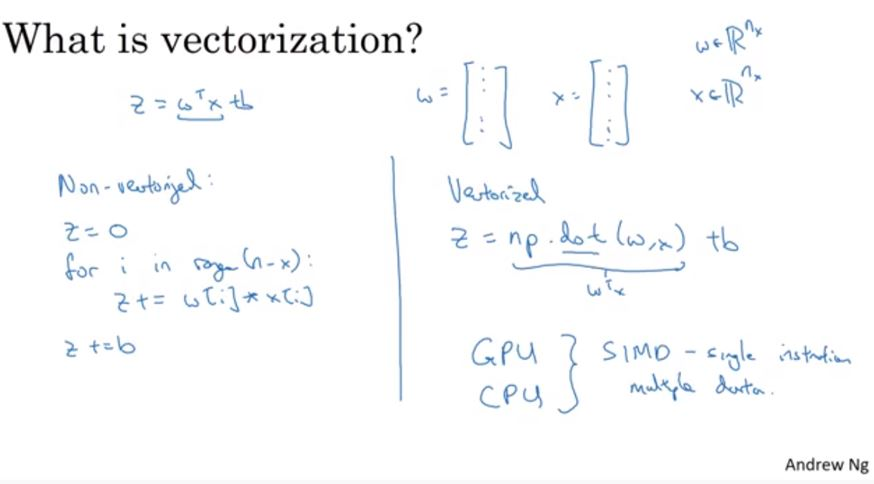





In [1]:
import numpy as np
import math

a=np.array([1,2,3,4])
print(a)

[1 2 3 4]


In [25]:
import time
a=np.random.rand(10000000)
b=np.random.rand(10000000)

tic=time.time()
c=np.dot(a,b)
toc=time.time()
print(c)
print("Version Vectorizada: "+str(1000*(toc-tic))+"ms")
c=0
tic=time.time()
for i in range(10000000):
  c += a[i]*b[i]
toc=time.time()
print(c)
print("Version del Loop: "+str(1000*(toc-tic))+"ms")


2499708.9195330827
Version Vectorizada: 14.360189437866211ms
2499708.919533019
Version del Loop: 6109.2400550842285ms


## Ejemplo numero 2

In [3]:
def lento(n=1000):
    x = np.linspace(-1,1,n)
    y = np.linspace(-1,1,n)
    z = np.empty((n,n))

    for i, _y in enumerate(y):
        for j, _x in enumerate(x):
            z[i, j] = math.sqrt(_x**2 + _y**2)
            
    return x, y, z

%time x, y, z = lento()

CPU times: user 1.2 s, sys: 6.81 ms, total: 1.21 s
Wall time: 1.22 s


In [4]:
import matplotlib.pyplot as plt

def plot(x, y, z):
    plt.contourf(x, y, z)
    plt.colorbar()
    plt.xlabel("x", fontsize="16")
    plt.ylabel("y", fontsize="16")
    plt.title("$z = \sqrt{x^2 + y^2 }$", fontsize="16")
    plt.show()

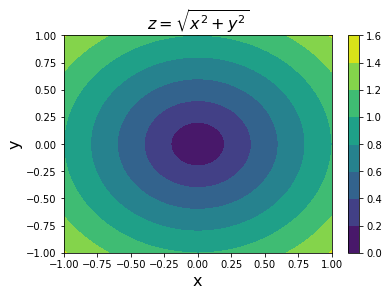

In [5]:
plot(x, y, z)

In [6]:
def rapido(n=1000):
    p = np.linspace(-1,1,n)
    x, y = np.meshgrid(p, p)
    z = np.sqrt(x**2 + y**2)
    return x, y, z

%time x, y, z = rapido()

CPU times: user 5.64 ms, sys: 11 ms, total: 16.6 ms
Wall time: 17.4 ms


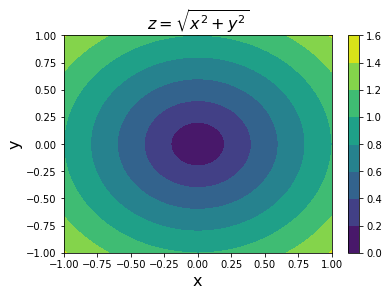

In [7]:
plot(x, y, z)

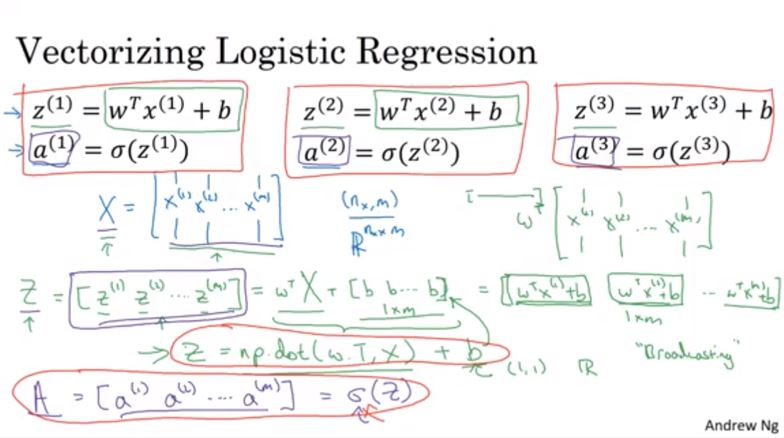

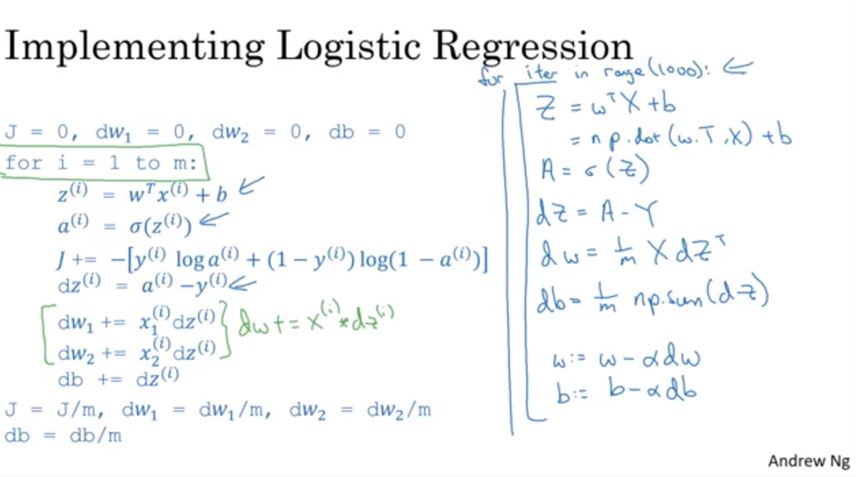

#Broadcasting

El broadcasting es la segunda propiedad (después de la vectorización) que le proporciona a NumPy su versatilidad y potencia a la hora de llevar a cabo operaciones con arrays. Como norma general, cuando Numpy espera arrays de la misma forma pero encuentra que esto no se cumple aplica las reglas del broadcasting. 

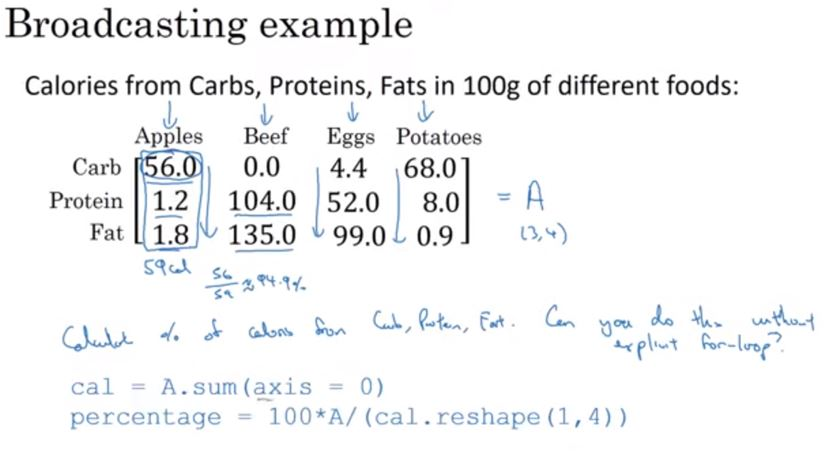

In [8]:
A=np.array([[56.0,0.0,4.4,68.0],
            [1.2,104.0,52.0,8.0],
           [1.8,135.0,99.0,0.9]])
print(A)

[[ 56.    0.    4.4  68. ]
 [  1.2 104.   52.    8. ]
 [  1.8 135.   99.    0.9]]


In [9]:
# calcular valor medio de cada columna
A.mean(axis=0)

array([19.66666667, 79.66666667, 51.8       , 25.63333333])

In [10]:
# suma todos los valores de cada fila
A.sum(axis=1)

array([128.4, 165.2, 236.7])

##Primera Regla 

Si dos arrays no tienen el mismo rango, entonces se añadirá una dimensión de 1 al principio del array con menor rango hasta que éstos coincidan.

In [11]:
a = np.arange(5).reshape(1, 1, 5)
a

array([[[0, 1, 2, 3, 4]]])

In [12]:
a.shape

(1, 1, 5)

In [13]:
b = np.arange(5)
b

array([0, 1, 2, 3, 4])

In [14]:
b.shape

(5,)

In [15]:
a + b

array([[[0, 2, 4, 6, 8]]])

##Segunda Regla

Si un array tiene un 1 en alguna dimensión en particular actuará como si tuviese la longitud del array con mayor longitud en aquella dimensión. Esto implica que el valor en esta dimensión se repetirá hasta coincidir con la longitud.

In [16]:
a = np.arange(6).reshape(2, 3)
a

array([[0, 1, 2],
       [3, 4, 5]])

In [17]:
a.shape

(2, 3)

In [18]:
b = np.array([[100], [200]])
b

array([[100],
       [200]])

In [19]:
b.shape

(2, 1)

In [20]:
a + b

array([[100, 101, 102],
       [203, 204, 205]])

In [21]:
a=np.random.randn(5,1)#Column Vector
b=np.random.randn(1,5)#Row Vector
a,b

(array([[-1.42217273],
        [ 0.84081748],
        [ 1.60690302],
        [ 0.14939784],
        [ 1.5277415 ]]),
 array([[-1.68267707,  0.37505087,  0.58866158, -0.51627231,  0.51597257]]))

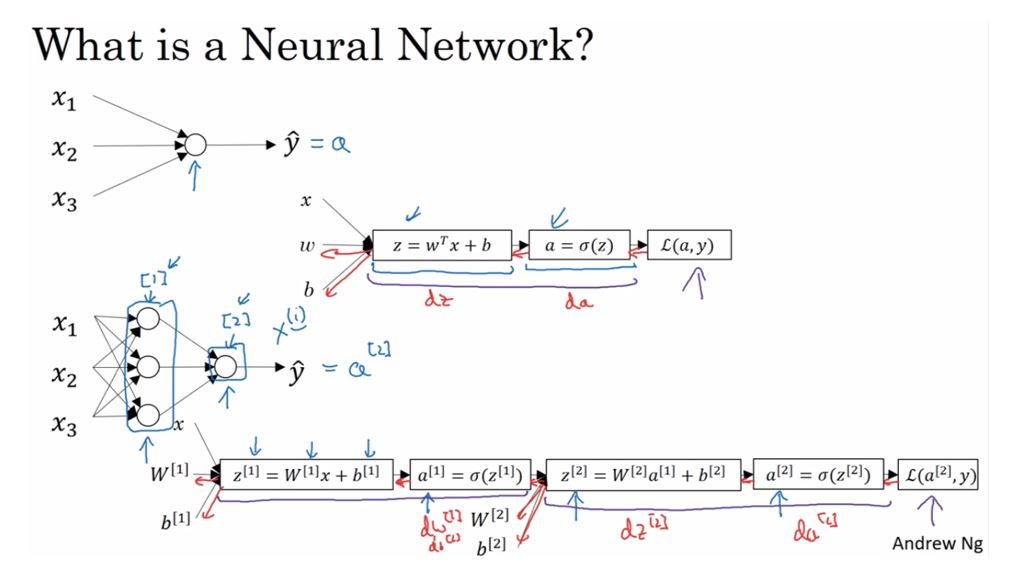

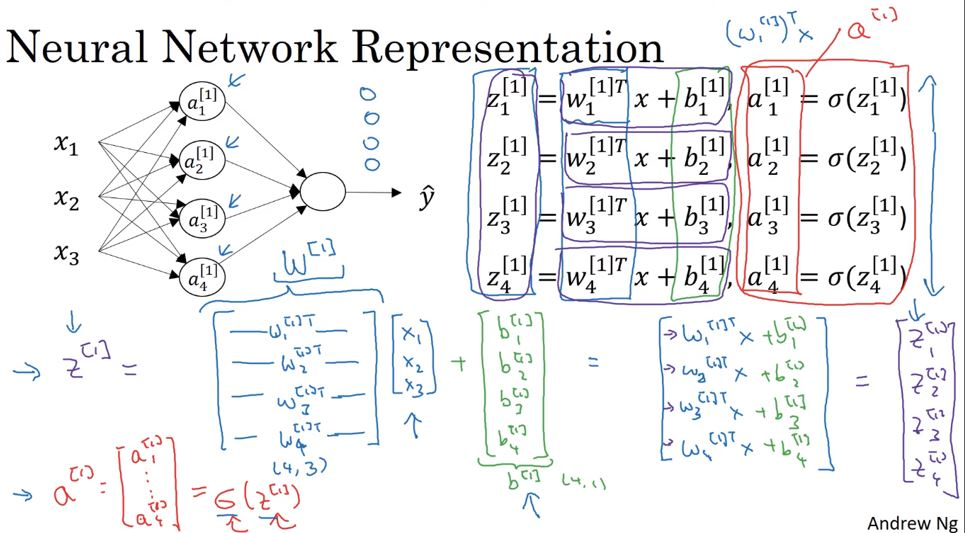

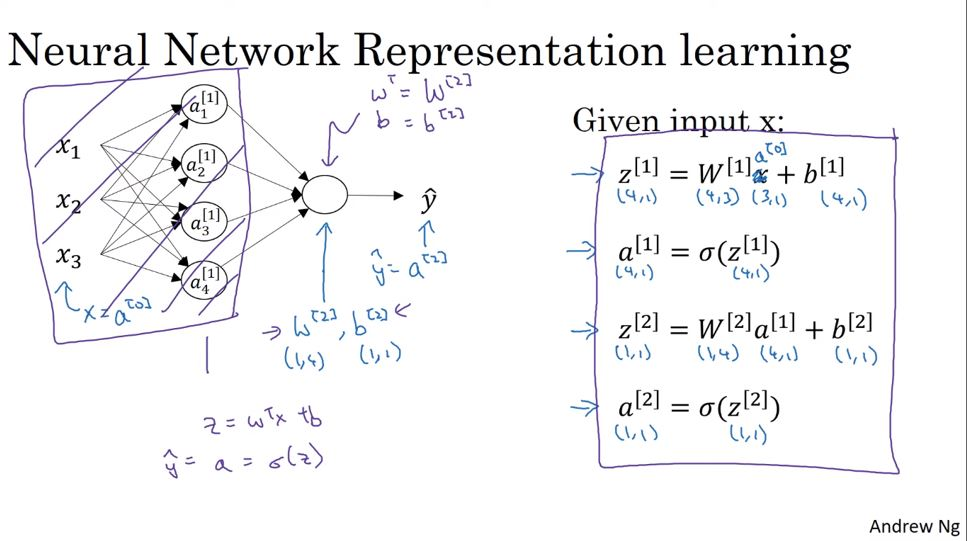

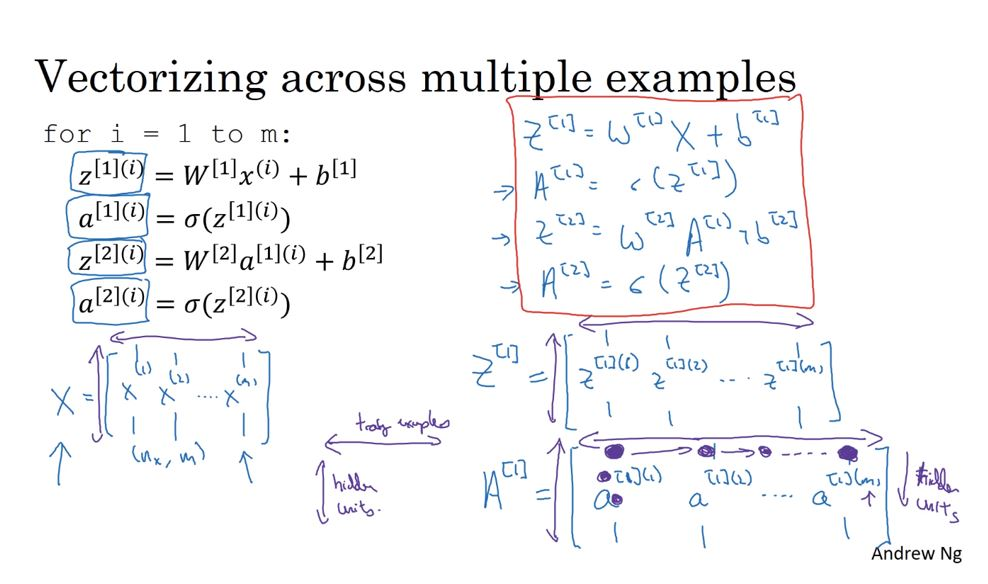

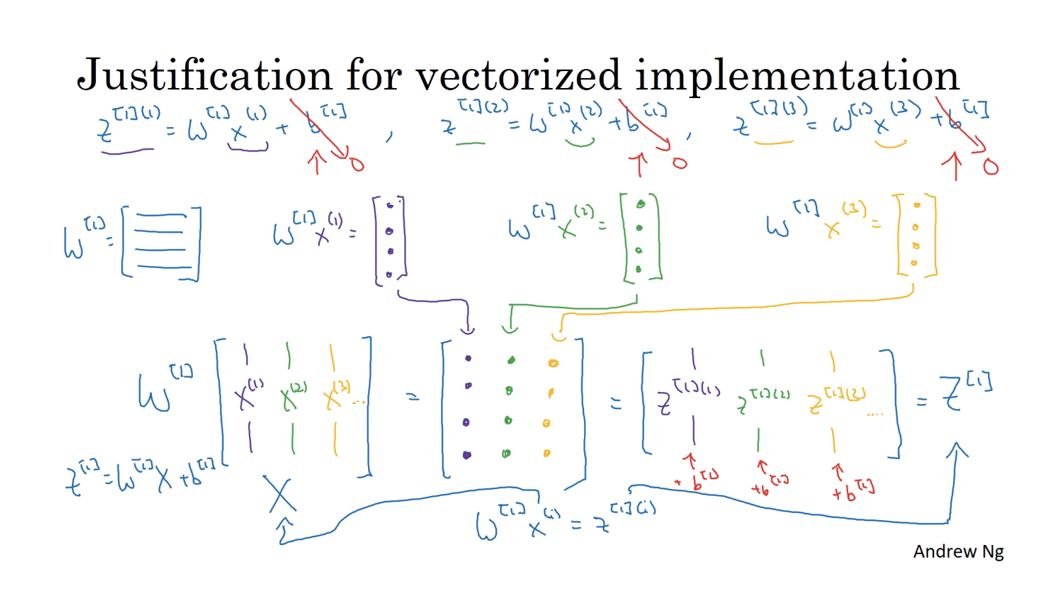



---



#Temas Extra

In [22]:
a = np.array([[2.5, 3.1, 7], [10, 11, 12]])
a

array([[ 2.5,  3.1,  7. ],
       [10. , 11. , 12. ]])

In [23]:
for func in (np.abs, np.sqrt, np.exp, np.log, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))


 absolute
[[ 2.5  3.1  7. ]
 [10.  11.  12. ]]

 sqrt
[[1.58113883 1.76068169 2.64575131]
 [3.16227766 3.31662479 3.46410162]]

 exp
[[1.21824940e+01 2.21979513e+01 1.09663316e+03]
 [2.20264658e+04 5.98741417e+04 1.62754791e+05]]

 log
[[0.91629073 1.13140211 1.94591015]
 [2.30258509 2.39789527 2.48490665]]

 ceil
[[ 3.  4.  7.]
 [10. 11. 12.]]

 modf
(array([[0.5, 0.1, 0. ],
       [0. , 0. , 0. ]]), array([[ 2.,  3.,  7.],
       [10., 11., 12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


In [24]:
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

min = 2.5
max = 12.0
sum = 45.6
prod = 71610.0
std = 3.7260345319566395
var = 13.883333333333333
